# Домашнее задание №13 

## Номер 1

Истинная модель: $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \varepsilon$

$\beta_1 > 0, \beta_2 < 0, Cov(x_1,x_2) = 0, Cov(x_1,x_3) > 0, $

Предположим, что мы решили построить следующую модель:
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + v$, где 
$v = \beta_3x_3 + \varepsilon$

Получаем оценки и предсказания:  $\widetilde{y} = \widetilde{\beta}_0 + \widetilde{\beta}_1x_1 + \widetilde{\beta}_2x_2$

Оценки коэффициентов множественной регрессии:

$$\widetilde{\beta}_1 = \hat{\beta}_1 + \hat{\beta}_2\frac{Cov(x_1,x_2)}{s^2_{x_1}} + \hat{\beta}_3\frac{Cov(x_1,x_3)}{s^2_{x_1}}$$
$$\widetilde{\beta}_2 = \hat{\beta}_2 + \hat{\beta}_1\frac{Cov(x_2,x_1)}{s^2_{x_2}} + \hat{\beta}_3\frac{Cov(x_2,x_3)}{s^2_{x_2}}$$

Расчитаем смещение:

$$E[\widetilde{\beta}_1|x_1] = E[\hat{\beta}_1|x_1] + E\left[\hat{\beta}_2\frac{Cov(x_1,x_2)}{s^2_{x_1}}|x_1\right] + E\left[\hat{\beta}_3\frac{Cov(x_1,x_3)}{s^2_{x_1}}|x_1\right] $$
$$E[\widetilde{\beta}_2|x_2] = E[\hat{\beta}_2|x_2] + E\left[\hat{\beta}_1\frac{Cov(x_2,x_1)}{s^2_{x_2}}|x_2\right] + E\left[\hat{\beta}_3\frac{Cov(x_2,x_3)}{s^2_{x_2}}|x_2\right] $$

т.к. $Cov(x_1,x_2) = 0 \Rightarrow E\left[\hat{\beta}_2\frac{Cov(x_1,x_2)}{s^2_{x_1}}|x_1\right] = E\left[\hat{\beta}_1\frac{Cov(x_2,x_1)}{s^2_{x_2}}|x_2\right] = 0$

$$E[\widetilde{\beta}_1|x_1] = \beta_1 + \beta_3\frac{Cov(x_1,x_3)}{s^2_{x_1}} $$
$$E[\widetilde{\beta}_2|x_2] = \beta_2 + \beta_3\frac{Cov(x_2,x_3)}{s^2_{x_2}} $$

Смещение $\widetilde{\beta}_1$ зависит только от знака $\beta_3$: 
- при $\beta_3>0$ смещение положительное
- при $\beta_3<0$ смещение отрицательное


Смещение $\widetilde{\beta}_2$ зависит от знака $\beta_3$ и от $Cov(x_2,x_3)$: 
- при $(\beta_3>0, Cov(x_2,x_3)>0)$ и $(\beta_3<0, Cov(x_2,x_3)<0)$ смещение положительное
- при $(\beta_3<0, Cov(x_2,x_3)>0)$ и $(\beta_3>0, Cov(x_2,x_3)<0)$ смещение отрицательное
- при $Cov(x_2,x_3)=0$ смещения не будет



## Номер 2

#### Подключение библиотек

In [11]:
from matplotlib import pyplot as plt

from utils import *

import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Определение параметров для модели

In [12]:
dist_params = dict(

    # Зададим параметры распределения факторов
    x1_mean = 5,
    x1_std = 3,
    x2_mean = 5,
    x2_std = 3,
    corr_12 = -0.7,
    
    # Зададим параметры распределения ошибки
    e_mean = 0,
    e_std = 3,

    # Укажем размер выборки
    N = 1000,

    # Зададим действительные параметры модели
    beta0 = 3,
    beta1 = 10.3,
    beta2 = -7.2
)

# Установим стартовую точку для алгоритма генерации случайных чисел
RANDOM_SEED = 42

In [13]:
# Сгенерируем датасет с нормальным распределением в регрессоре
data = gen_data(y_type='multivariate', params=dist_params, seed=RANDOM_SEED)

display(data)

,x1,x2,e,y
0,3.465508,6.213195,-2.025535,-8.065806
1,4.978183,8.561019,-0.433556,-7.797608
2,5.375594,4.080321,-2.377260,26.613042
3,1.523792,10.259565,-0.923885,-56.097700
4,6.928900,4.331896,-5.680844,37.497174
...,...,...,...,...
995,3.662584,8.090231,0.232442,-17.292605
996,2.534603,9.111347,0.773258,-35.722029
997,5.271345,7.215460,-3.725282,1.618255
998,4.048708,3.902000,1.002529,17.609826


### Задача 2.1

#### Оценка коэффициентов методом МНК

In [14]:
data, model_linearity = train_model(data, target='y', feature_names=['x1', 'x2'], show_results=True, show_plots=False, pairwise=False, return_norm_tests=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.245e+05
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:40:26   Log-Likelihood:                -2499.8
No. Observations:                1000   AIC:                             5006.
Df Residuals:                     997   BIC:                             5020.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7904      0.412      6.774      0.0

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
0,Shapiro-Wilk test,0.95,0.05,0.671426,True,0.998675,,,gaussian distribution
1,Epps-Pulley test,0.95,0.05,0.957763,True,0.014878,0.3778,True,gaussian distribution
2,D'Agostino's K-squared test,0.95,0.05,0.407309,True,1.796368,,,gaussian distribution
3,Anderson-Darling test,0.95,0.05,,,0.225355,0.784,True,gaussian distribution
4,Kolmogorov–Smirnov test,0.95,0.05,0.884376,True,0.018314,,,gaussian distribution
5,Lilliefors test,0.95,0.05,0.641481,True,0.018434,,,gaussian distribution
6,Cramér–von Mises test,0.95,0.05,0.956451,True,0.035144,,,gaussian distribution
7,Chi-squared test,0.95,0.05,1.0,True,-80421421917330276352.0,,,gaussian distribution
8,Jarque–Bera test,0.95,0.05,-,-,-,,,count less than 2000
9,skewtest,0.95,0.05,0.445155,True,0.763517,,,gaussian distribution


In [15]:
data

,x1,x2,e,y,y_hat,residuals
0,3.465508,6.213195,-2.025535,-8.065806,-5.994202,-2.071604
1,4.978183,8.561019,-0.433556,-7.797608,-7.219929,-0.577679
2,5.375594,4.080321,-2.377260,26.613042,28.970556,-2.357514
3,1.523792,10.259565,-0.923885,-56.097700,-54.990973,-1.106727
4,6.928900,4.331896,-5.680844,37.497174,43.178633,-5.681459
...,...,...,...,...,...,...
995,3.662584,8.090231,0.232442,-17.292605,-17.407755,0.115150
996,2.534603,9.111347,0.773258,-35.722029,-36.347999,0.625970
997,5.271345,7.215460,-3.725282,1.618255,5.439681,-3.821426
998,4.048708,3.902000,1.002529,17.609826,16.571519,1.038307


#### Вывод

1. Полученные оценки коэффициентов модели получились довольно близкие к истинным значениям
2. Доверительные интервалы оценок содержат истинные значения
3. Коэффициент $R^2 = 0.996$, что может говорить о хорошем качестве модели 
4. Так же все тесты на распределение остатков (кроме Jarque–Bera test из-за нехватки размерности) подтверждают нормальность распределения

### Задача 2.2

#### Отрисовка графиков

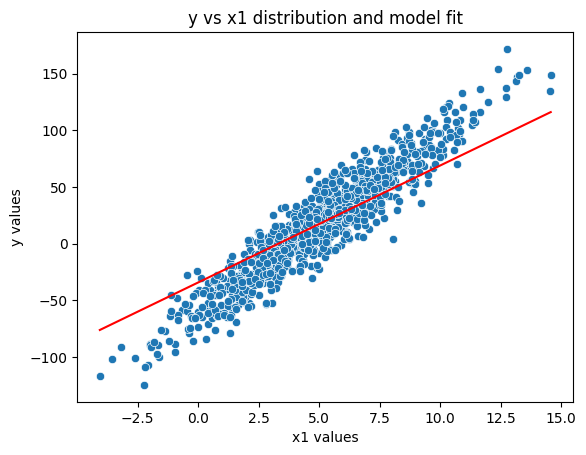

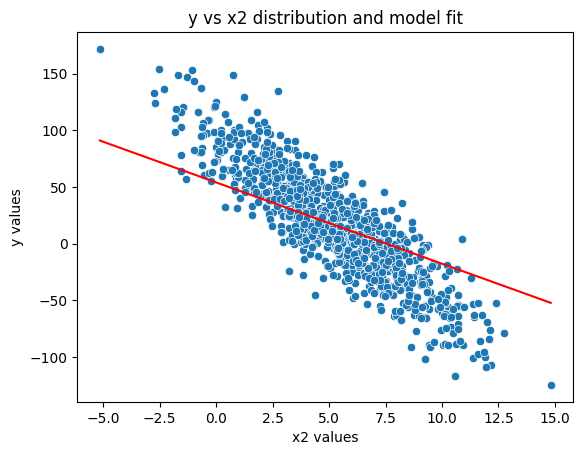

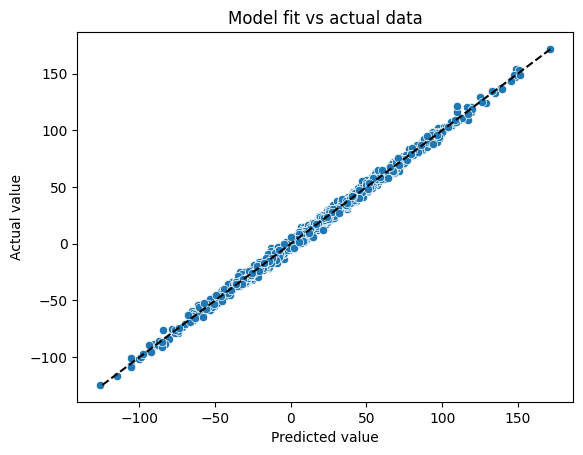

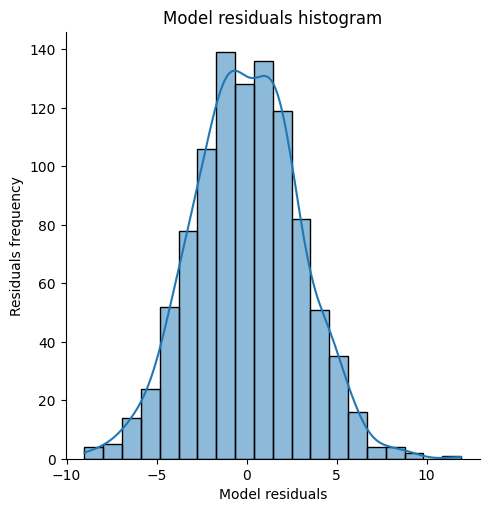

In [16]:
data, model_linearity = train_model(data, target='y', feature_names=['x1', 'x2'], show_results=False, show_plots=True, pairwise=False, return_norm_tests=True)


#### Комментарии по графикам

1. $(y\ vs \ x_1)$, $(y\ vs \ x_2)$:

    Из полученных графиков можно увидеть, что таргет $y$ и регрессоры $x_1$, $x_2$ зависят линейно. Кроме того можно так же сделать вывод, что полученная модель неплохо описывает эту зависимость. 

2. $(y\ vs \ \hat{y})$:

    Из графика видно, что предсказания полученной модели и таргет $y$ очень сильно скоррелированы, так как все точки на графике практически лежат на одной прямой.

3. Гистограмма остатков:

    Из полученной гистограммы видно что распределение остатков очень похоже на гистограмму нормального распределения, что подтверждает результаты тестов из задания **2.1** 

#### Проверка зависимости от размера выборки

In [23]:
coefs_list = dict(
    b1 = [],
    b1_low = [],
    b1_high = [],

    b2 = [],
    b2_low = [],
    b2_high = [],
    
)

for i in range(30, 1001):
    dist_params['N'] = i
    data = gen_data(y_type='multivariate', params=dist_params, seed=RANDOM_SEED)
    _, model = train_model(data, target='y', feature_names=['x1', 'x2'], show_results=False, show_plots=False, pairwise=False, return_norm_tests=False)
    intervals = model.conf_int()

    coefs_list['b1'].append(model.params[1])
    coefs_list['b1_low'].append(intervals.iloc[1][0])
    coefs_list['b1_high'].append(intervals.iloc[1][1])


    coefs_list['b2'].append(model.params[2])
    coefs_list['b2_low'].append(intervals.iloc[2][0])
    coefs_list['b2_high'].append(intervals.iloc[2][1])



##### Коэффициент $\beta_1$

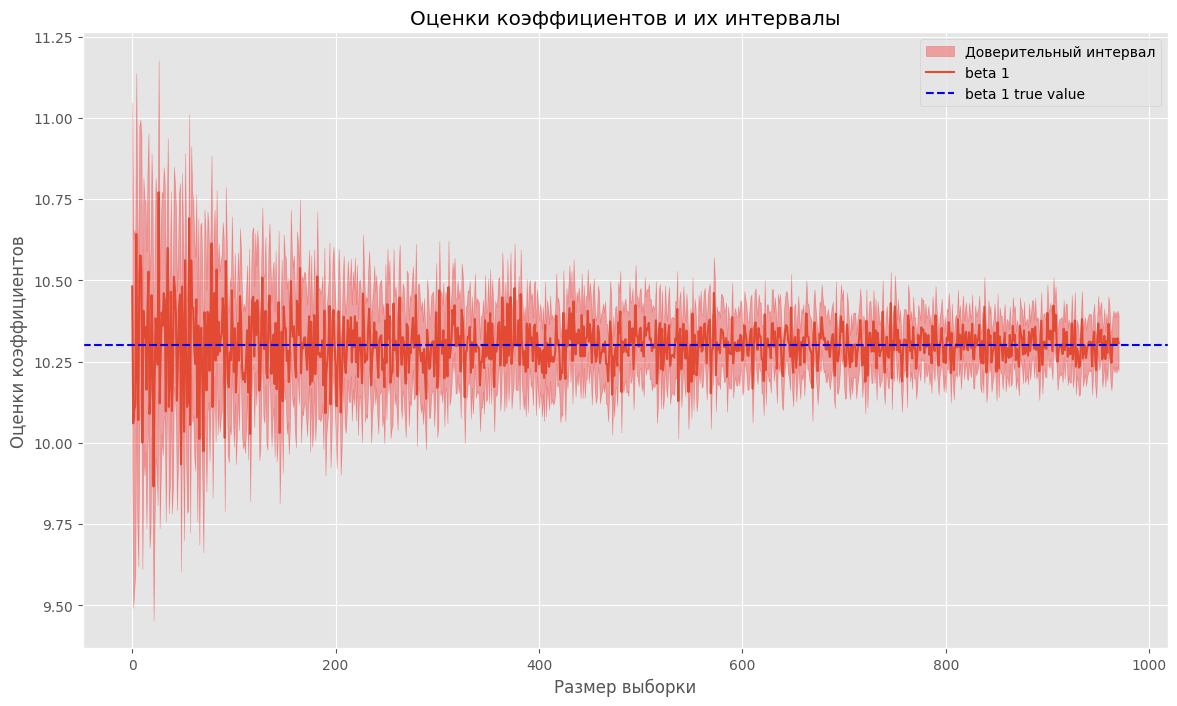

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(14,8))
X = [i for i in range(0, 971)]
plt.fill_between(X, coefs_list['b1_low'], coefs_list['b1_high'], color='red', alpha=0.3, label='Доверительный интервал')
plt.plot(coefs_list['b1'], label='beta 1')
plt.axhline(dist_params['beta1'], color='b', linestyle='dashed', label='beta 1 true value')

plt.title('Оценки коэффициентов и их интервалы')
plt.xlabel('Размер выборки')
plt.ylabel('Оценки коэффициентов')

plt.legend()

plt.show()

##### Коэффициент $\beta_2$

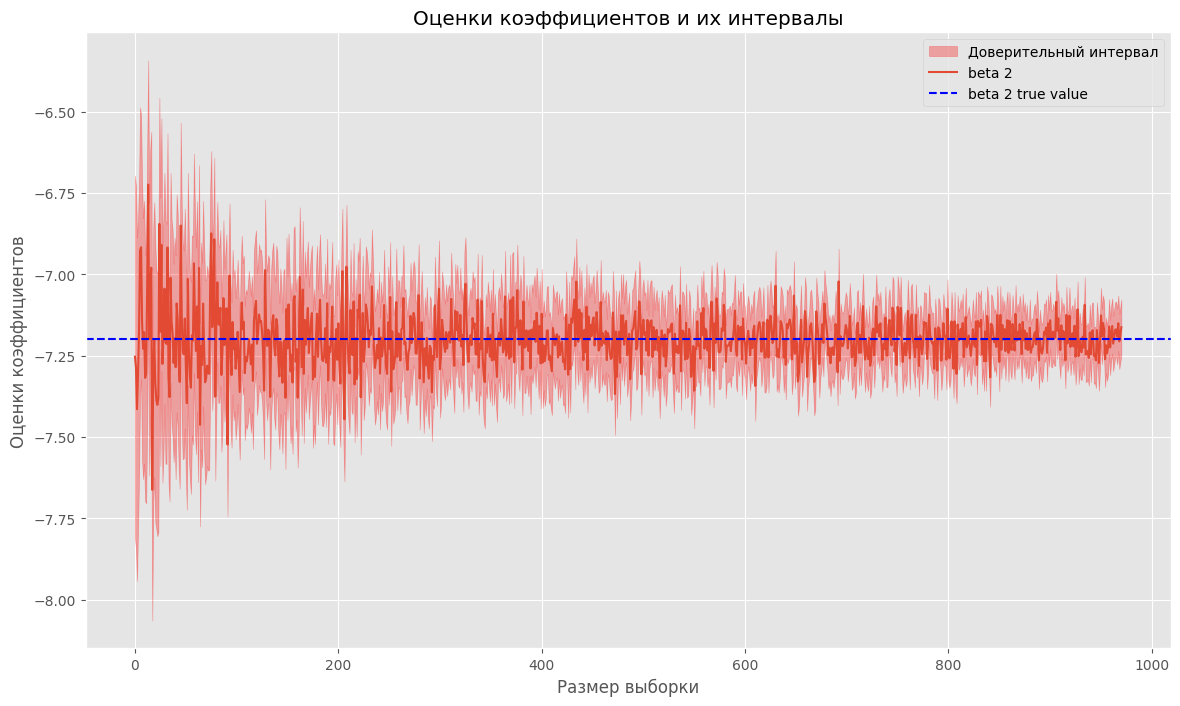

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=(14,8))
X = [i for i in range(0, 971)]
plt.fill_between(X, coefs_list['b2_low'], coefs_list['b2_high'], color='red', alpha=0.3, label='Доверительный интервал')
plt.plot(coefs_list['b2'], label='beta 2')
plt.axhline(dist_params['beta2'], color='b', linestyle='dashed', label='beta 2 true value')


plt.title('Оценки коэффициентов и их интервалы')
plt.xlabel('Размер выборки')
plt.ylabel('Оценки коэффициентов')

plt.legend()

plt.show()

#### Комментарии

Как видно из графиков, с увеличением выборки оценки коэффициентов все больше стремятся к истинному значению коэффициента.

Так же с увелечением выборки уменьшается ширина двустороннего доверительного интервала.